Analisis Varians (ANOVA) pada Kadar Tembaga (Copper) Berdasarkan Status Pasien Sirosis
Analisis ini bertujuan untuk mengetahui apakah terdapat perbedaan rata-rata kadar tembaga (Copper) di dalam serum berdasarkan status pasien sirosis. Status pasien dikategorikan menjadi tiga kelompok:

- C: Censored (pasien masih hidup saat penelitian berakhir)
- CL: Censored due to liver transplantation (pasien melakukan transplantasi hati)
- D: Death (pasien meninggal)

In [73]:
import kaggle

kaggle.api.authenticate()
kaggle.api.dataset_download_files('joebeachcapital/cirrhosis-patient-survival-prediction', path='.', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/joebeachcapital/cirrhosis-patient-survival-prediction


### Variables Table

| Variable Name  | Role     | Type        | Demographic | Description                                                                                                                                       | Units     | Missing Values |
|----------------|----------|-------------|-------------|---------------------------------------------------------------------------------------------------------------------------------------------------|-----------|----------------|
| ID             | ID       | Integer     |             | Unique identifier                                                                                                                                 |           | no             |
| N_Days         | Other    | Integer     |             | Number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986                               |           | no             |
| Status         | Target   | Categorical |             | Status of the patient: C (censored), CL (censored due to liver tx), or D (death)                                                                 |           | no             |
| Drug           | Feature  | Categorical |             | Type of drug: D-penicillamine or placebo                                                                                                          |           | yes            |
| Age            | Feature  | Integer     | Age         | Age                                                                                                                                               | days      | no             |
| Sex            | Feature  | Categorical | Sex         | M (male) or F (female)                                                                                                                            |           | no             |
| Ascites        | Feature  | Categorical |             | Presence of ascites: N (No) or Y (Yes)                                                                                                            |           | yes            |
| Hepatomegaly   | Feature  | Categorical |             | Presence of hepatomegaly: N (No) or Y (Yes)                                                                                                       |           | yes            |
| Spiders        | Feature  | Categorical |             | Presence of spiders: N (No) or Y (Yes)                                                                                                            |           | yes            |
| Edema          | Feature  | Categorical |             | Presence of edema: N (no edema and no diuretic therapy), S (edema without diuretics or resolved by them), Y (edema despite diuretics)            |           | no             |
| Copper      | Feature  | Continuous  |             | Serum Copper                                                                                                                                   | mg/dl     | no             |
| Copper    | Feature  | Integer     |             | Serum Copper                                                                                                                                 | mg/dl     | yes            |
| Copper        | Feature  | Continuous  |             | Copper                                                                                                                                            | gm/dl     | no             |
| Copper         | Feature  | Integer     |             | Urine copper                                                                                                                                      | ug/day    | yes            |
| Alk_Phos       | Feature  | Continuous  |             | Alkaline phosphatase                                                                                                                              | U/liter   | yes            |
| SGOT           | Feature  | Continuous  |             | SGOT                                                                                                                                              | U/ml      | yes            |
| Tryglicerides  | Feature  | Integer     |             | Tryglicerides                                                                                                                                     |           | yes            |
| Platelets      | Feature  | Integer     |             | Platelets per cubic                                                                                                                               | ml/1000   | yes            |
| Prothrombin    | Feature  | Continuous  |             | Prothrombin time                                                                                                                                  | s         | yes            |
| Stage          | Feature  | Categorical |             | Histologic stage of disease (1, 2, 3, or 4)                                                                                                       |           | yes            |

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levene
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot

In [75]:
data = pd.read_csv('cirrhosis.csv', sep=',')
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


Analisis difokuskan pada variabel Copper (kadar tembaga serum) dan Status (status akhir pasien).

In [79]:
df = data[['Status','Copper']]
df = df.dropna(subset=['Status','Copper'])
category = df.Status.unique()
category

array(['D', 'C', 'CL'], dtype=object)

Sebelum melakukan uji ANOVA, beberapa asumsi harus dipenuhi. Salah satu asumsi utama adalah homogenitas varians, yang berarti varians (keragaman data) pada setiap kelompok harus serupa.

Hipotesis nol (yang menyatakan varians homogen) ditolak. Ini berarti varians data antar kelompok tidak homogen, sehingga asumsi ANOVA tidak terpenuhi.

In [80]:
# Levene's test
statistic, p_value = levene(*[df.Copper[df.Status == cat] for cat in category])
print("Levene's test statistic:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Variances are not homogeneous between groups.")
else:
    print("Fail to reject the null hypothesis: Variances are homogeneous between groups.")

Levene's test statistic: 13.418344460772083
p-value: 2.5897734172226775e-06
Reject the null hypothesis: Variances are not homogeneous between groups.


In [81]:
df.head()

,Status,Copper
0,D,156.0
1,C,54.0
2,D,210.0
3,D,64.0
4,CL,143.0


In [82]:
df = data[['Status','Copper']]
df = df.dropna(subset=['Status','Copper'])
category = df.Status.unique()
category

array(['D', 'C', 'CL'], dtype=object)

In [83]:
# Levene's test
statistic, p_value = levene(*[df.Copper[df.Status == cat] for cat in category])
print("Levene's test statistic:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Variances are not homogeneous between groups.")
else:
    print("Fail to reject the null hypothesis: Variances are homogeneous between groups.")

Levene's test statistic: 13.418344460772083
p-value: 2.5897734172226775e-06
Reject the null hypothesis: Variances are not homogeneous between groups.


Plot menunjukkan bahwa data tidak terdistribusi secara normal, terlihat dari titik-titik yang menyimpang dari garis lurus.

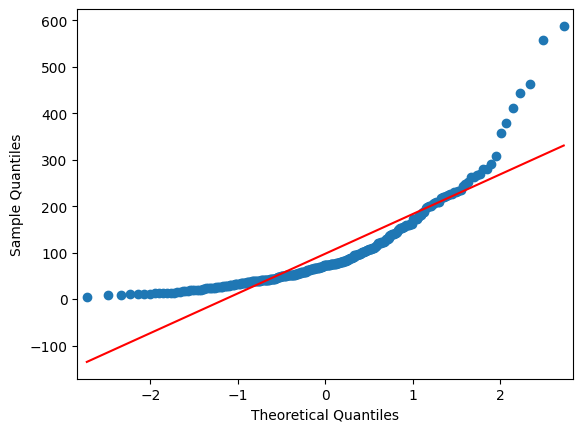

In [84]:
qqplot(df['Copper'],line='s')
plt.show()

Karena asumsi normalitas dan homogenitas varians tidak terpenuhi, dilakukan transformasi logaritmik pada data Copper menggunakan metode Box-Cox. Transformasi ini bertujuan untuk menormalkan distribusi data dan menyeragamkan varians.

In [85]:
df['Copper_log_t']=stats.boxcox(df['Copper'], 0)

Plot menunjukkan distribusi Copper setelah transformasi Box-Cox lebih mendekati distribusi normal.

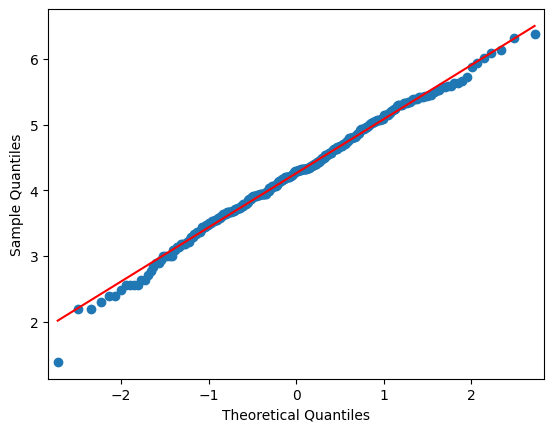

In [86]:
qqplot(df['Copper_log_t'],line='s')
plt.show()

Uji Levene kembali dilakukan pada data Copper yang telah ditransformasi, dan hipotesis nol diterima. Ini berarti varians data antar kelompok sudah homogen, dan asumsi ANOVA terpenuhi.


In [87]:
# Levene's test
statistic, p_value = levene(*[df.Copper_log_t[df.Status == cat] for cat in category])
print("Levene's test statistic:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Variances are not homogeneous between groups.")
else:
    print("Fail to reject the null hypothesis: Variances are homogeneous between groups.")

Levene's test statistic: 0.6685194408068202
p-value: 0.5132111633577463
Fail to reject the null hypothesis: Variances are homogeneous between groups.


Setelah asumsi terpenuhi, uji ANOVA dilakukan pada data yang telah ditransformasi untuk membandingkan rata-rata kadar tembaga di antara ketiga kelompok status pasien. Diperoleh p-value yang sangat signifikan (2.5385e-14), yang jauh lebih kecil dari 0.05. Sehingga, terdapat perbedaan rata-rata kadar tembaga yang signifikan secara statistik di antara setidaknya dua dari tiga kelompok status pasien.

In [88]:
Stat,p = f_oneway( df['Copper_log_t'][df['Status'] == 'D'],
     df['Copper_log_t'][df['Status'] == 'C'],
     df['Copper_log_t'][df['Status'] == 'CL'],
                 )

if p < 0.05:
    print(f"One-way ANOVA is significant (p-value = {p:.4e})")
    print("Artinya, setidaknya ada satu grup yang memiliki rata-rata Copper yang berbeda secara signifikan.")
else:
    print(f"One-way ANOVA is not significant (p-value = {p:.4f})")

One-way ANOVA is significant (p-value = 2.5385e-14)
Artinya, setidaknya ada satu grup yang memiliki rata-rata Copper yang berbeda secara signifikan.


Uji ANOVA hanya memberi tahu bahwa ada perbedaan, tetapi tidak secara spesifik kelompok mana yang berbeda. Untuk itu, dilakukan uji lanjutan Tukey HSD.

In [89]:
# Tukey
tukey = pairwise_tukeyhsd(endog=df['Copper_log_t'], groups=df['Status'],alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     C     CL   0.6587 0.0009  0.2324 1.0849   True
     C      D    0.717    0.0  0.5083 0.9257   True
    CL      D   0.0583 0.9463 -0.3754  0.492  False
---------------------------------------------------


Pasien dalam kelompok C (Censored) memiliki rata-rata kadar tembaga yang berbeda secara signifikan dibandingkan dengan pasien dalam kelompok CL (transplantasi hati) dan kelompok D (meninggal). Namun, tidak ada perbedaan signifikan dalam rata-rata kadar tembaga antara kelompok pasien yang menjalani transplantasi hati (CL) dan yang meninggal (D).